In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn import tree

In [2]:
iris = load_iris()

In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [10]:
iris.target[0]

0

In [11]:
for i in range(len(iris.target)):
    print("Example %d: label %s, feature %s" % (i,iris.target[i],iris.data[i]))

Example 0: label 0, feature [5.1 3.5 1.4 0.2]
Example 1: label 0, feature [4.9 3.  1.4 0.2]
Example 2: label 0, feature [4.7 3.2 1.3 0.2]
Example 3: label 0, feature [4.6 3.1 1.5 0.2]
Example 4: label 0, feature [5.  3.6 1.4 0.2]
Example 5: label 0, feature [5.4 3.9 1.7 0.4]
Example 6: label 0, feature [4.6 3.4 1.4 0.3]
Example 7: label 0, feature [5.  3.4 1.5 0.2]
Example 8: label 0, feature [4.4 2.9 1.4 0.2]
Example 9: label 0, feature [4.9 3.1 1.5 0.1]
Example 10: label 0, feature [5.4 3.7 1.5 0.2]
Example 11: label 0, feature [4.8 3.4 1.6 0.2]
Example 12: label 0, feature [4.8 3.  1.4 0.1]
Example 13: label 0, feature [4.3 3.  1.1 0.1]
Example 14: label 0, feature [5.8 4.  1.2 0.2]
Example 15: label 0, feature [5.7 4.4 1.5 0.4]
Example 16: label 0, feature [5.4 3.9 1.3 0.4]
Example 17: label 0, feature [5.1 3.5 1.4 0.3]
Example 18: label 0, feature [5.7 3.8 1.7 0.3]
Example 19: label 0, feature [5.1 3.8 1.5 0.3]
Example 20: label 0, feature [5.4 3.4 1.7 0.2]
Example 21: label 0, fe

# SPLIT DATASET

In [16]:
test_idx = [0,50,100]

In [17]:
#training data
train_target = np.delete(iris.target,test_idx)
train_data = np.delete(iris.data,test_idx,axis=0)

#testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

In [18]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
#show actual results from test data to compare with prediction
print(test_target)

[0 1 2]


In [24]:
print(clf.predict(test_data))

[0 1 2]


In [30]:
clf_fit = clf.fit(train_data,train_target)

In [33]:
import graphviz

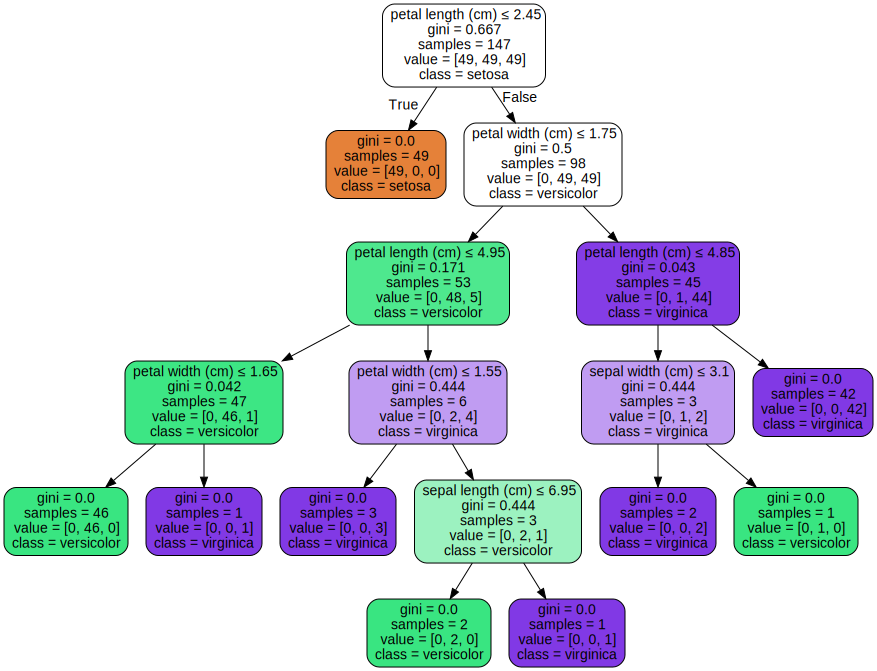

In [35]:
dot_data = tree.export_graphviz(clf_fit,out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True,
                               impurity=False)
graph = graphviz.Source(dot_data)
graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt

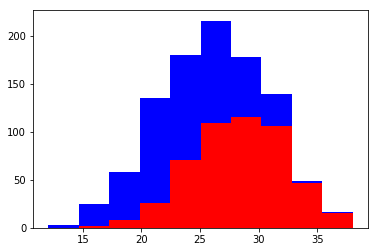

In [3]:
greyhounds = 500
labs = 500

grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)


plt.hist([grey_height,lab_height],stacked=True, color=['r','b'])
plt.show()


In [4]:
X = iris.data
Y = iris.target
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5)
#parition labels to two sets
#75 data points will be training, 75 data points will be testing

In [5]:
my_classifier = tree.DecisionTreeClassifier()
my_classifier.fit(X_train,y_train)
predictions = my_classifier.predict(X_test)
print(predictions) #corresponds to what type of class each classifier predicts (setosa, veriscolor, etc)

[0 1 2 2 2 0 0 0 1 1 1 0 2 2 1 1 2 0 1 1 1 2 0 2 1 0 1 2 1 1 0 1 0 2 1 1 0
 0 2 0 1 2 2 1 1 1 0 2 0 2 0 0 0 0 1 2 2 0 2 2 1 1 1 1 1 2 2 2 2 0 2 2 0 1
 0]


In [6]:
#see how accurate it was
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
#this results will differ each time since randomness in data partiioning

0.96


In [7]:
#instead of decision tree, try KNN 
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
predictions_knn = knn_classifier.predict(X_test)
print(accuracy_score(y_test,predictions_knn))

0.9466666666666667


In [10]:
#instead of importing a classifier, make one from scratch 
#guess the label
import random

class ScrappyKNN():
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X_test):
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        return predictions
    
scrapknn_classifier = ScrappyKNN()
scrapknn_classifier.fit(X_train,y_train)
predictions_scrapknn = scrapknn_classifier.predict(X_test)
print(accuracy_score(y_test,predictions_scrapknn))

0.24


In [12]:
from scipy.spatial import distance

def euc(a,b):
    return distance.euclidean(a,b)

class ScrappyKNN():
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for i in range(1,len(self.X_train)):
            dist = euc(row,self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i 
        return self.y_train[best_index]
    
scrapknn_classifier = ScrappyKNN()
scrapknn_classifier.fit(X_train,y_train)
predictions_scrapknn = scrapknn_classifier.predict(X_test)
print(accuracy_score(y_test,predictions_scrapknn))
#disadvantage of having to iterate thru each individual datapoint which is slower; simplistic

0.9466666666666667
